In [4]:
import io
import os
import json
import time
import string
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime
from collections import Counter
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
mydpi=600
b=False
blue, red, grey ='#336699', '#9A3334', '#AAAAAA'

__author__ = 'HK Dambanemuya'
__version__ = 'Python2'

In [5]:
df = pd.read_csv("../Data/Fusion/news.csv")
df = df[df['length']>100]

In [3]:
print ("Unique Sources:", df[df['align']!=-9999]['source'].nunique())
print ("Unique Left Sources:", df[(df['align']<-.3) & (df['align']!=-9999)]['source'].nunique())
print ("Unique Neutral Sources:", df[(df['align']>-.3) & (df['align']<.3)]['source'].nunique())
print ("Unique Right Sources:", df[(df['align']>.3) & (df['align']!=-9999)]['source'].nunique())
print ("Number of Left Articles:", len(df[(df['align']<-.3) & (df['align']!=-9999)]))
print ("Number of Neutral Articles:", len(df[(df['align']>-.3) & (df['align']<.3)]))
print ("Number of Right Articles:", len(df[(df['align']>.3) & (df['align']!=-9999)]))
print ("Percentage of Top 500 Sources: {0}%".format(np.true_divide(df[df['align']!=-9999]['source'].nunique()*100,500)))
print ("Average Document Length:", np.mean(df['length']), np.std(df['length']))

Unique Sources: 297
Unique Left Sources: 110
Unique Neutral Sources: 105
Unique Right Sources: 82
Number of Left Articles: 53243
Number of Neutral Articles: 121198
Number of Right Articles: 46851
Percentage of Top 500 Sources: 59.4%
Average Document Length: 590.4917775899409 623.7100323735968


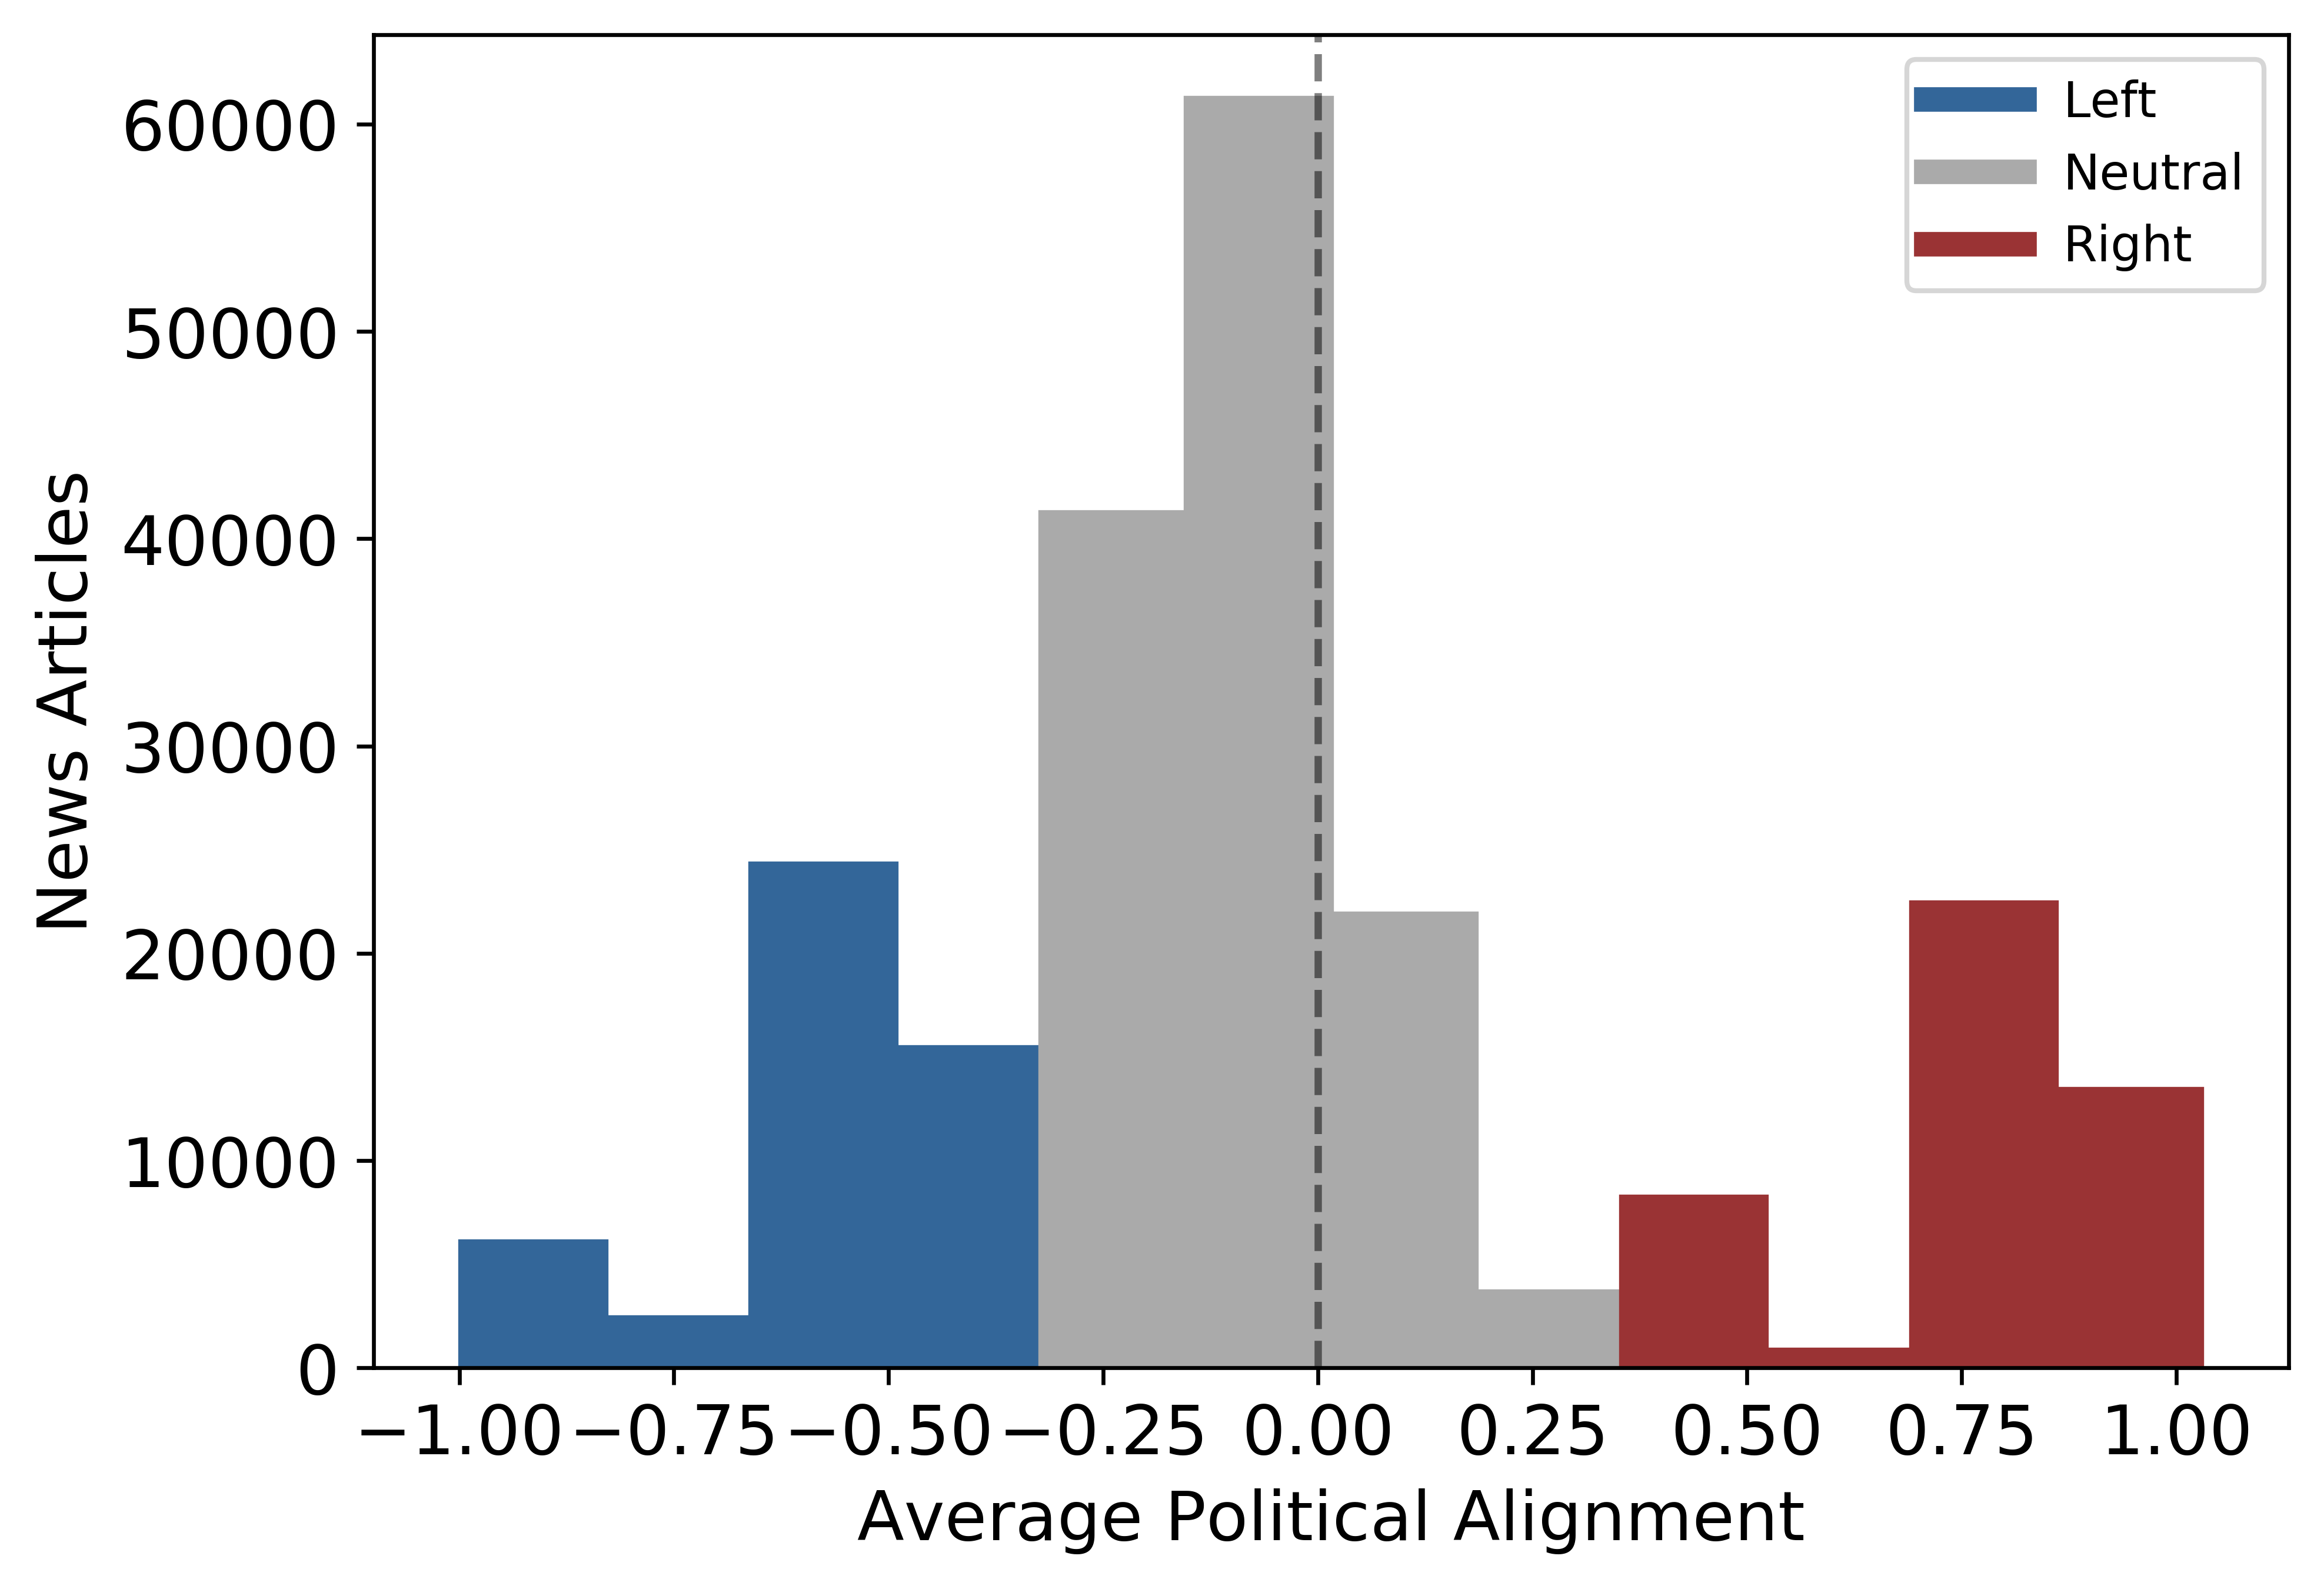

In [27]:
fig = plt.figure(figsize=(7,5), dpi=mydpi)
ax = df[df['align']!=-9999]['align'].plot(kind='hist', bins=12, ax = plt.gca())
for patch in ax.patches[:4]: patch.set_color(blue)
for patch in ax.patches[4:8]: patch.set_color(grey)
for patch in ax.patches[8:]: patch.set_color(red) 
plt.axvline(x=0, ymin=0, ymax=1, color='k', alpha=0.5, linestyle='--')
plt.xlabel("Average Political Alignment", fontsize=14)
plt.ylabel("News Articles", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
legend_elements = [Line2D([0], [0], color=blue, lw=5, label='Left'),
                   Line2D([0], [0], color=grey, lw=5, label='Neutral'),
                   Line2D([0], [0], color=red, lw=5, label='Right')]
plt.legend(handles=legend_elements,)
plt.savefig('../images/news/alignment_hist')
plt.show()

In [22]:
counts, bins = np.histogram(left, bins=8)
counts*0.5, bins

(array([ 9915.5,  1369. ,   792.5,   596.5,   652.5,   865.5,  1402. ,
        11028. ]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]))

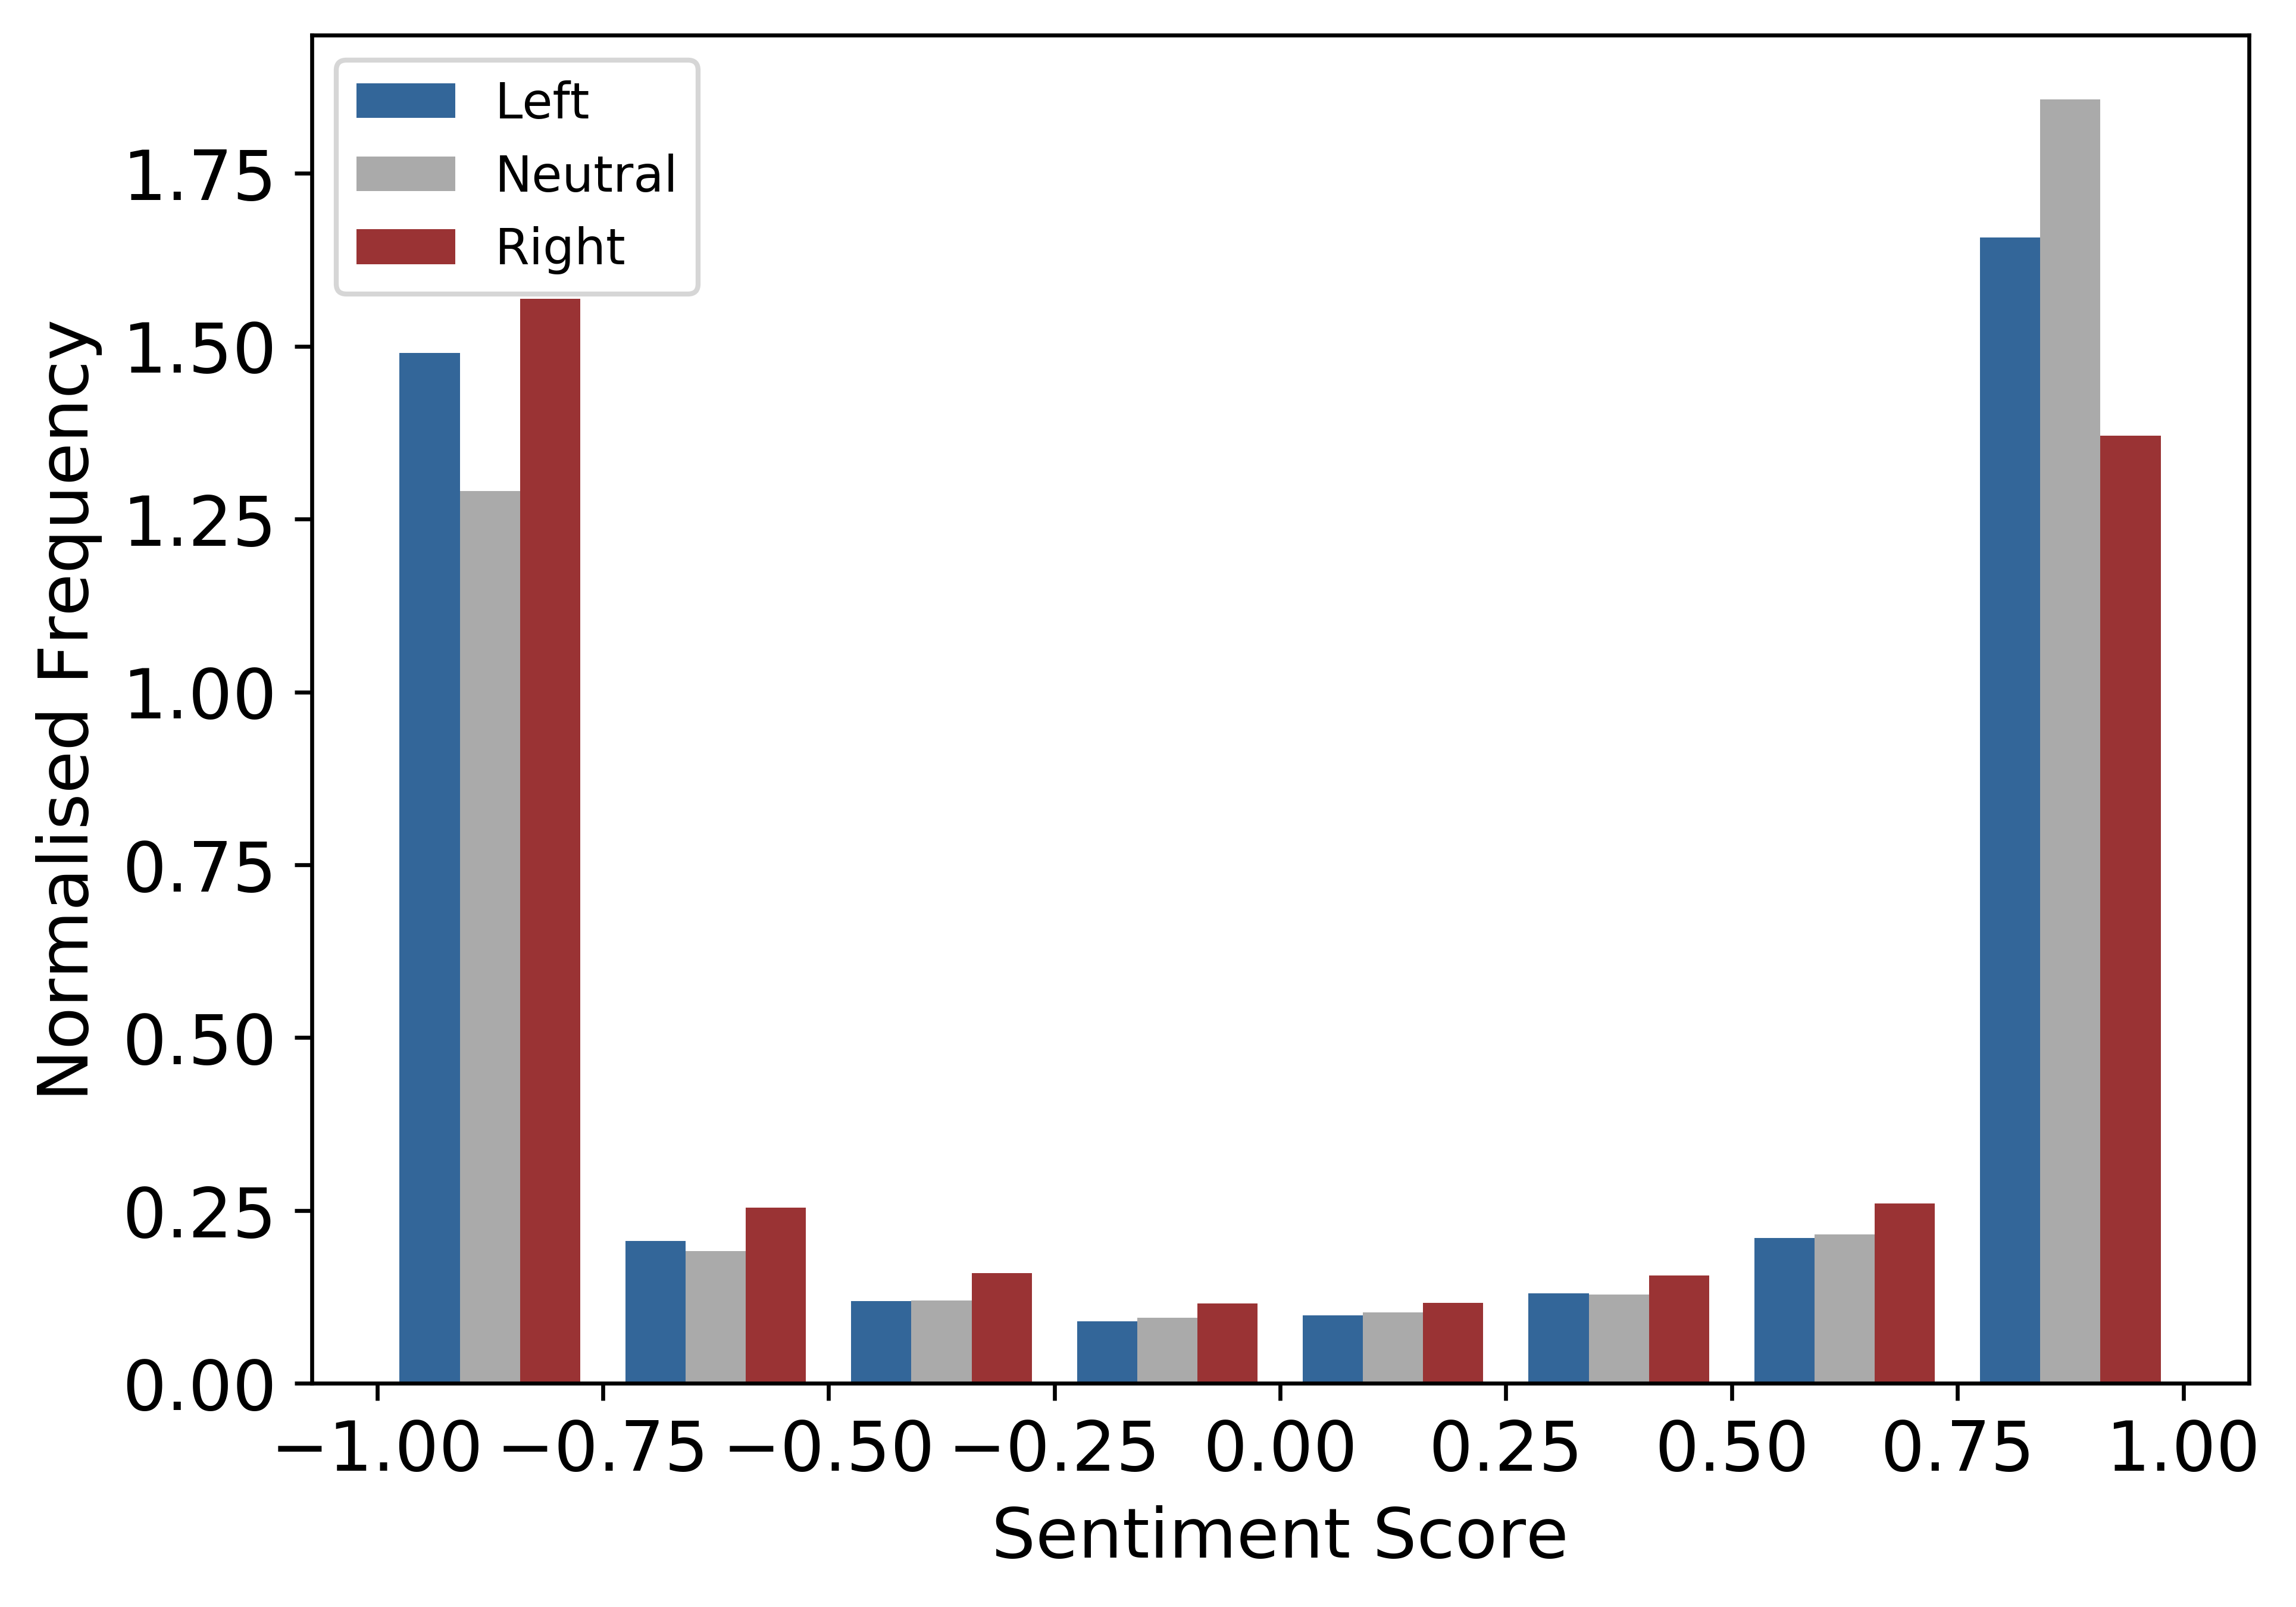

In [37]:
fig = plt.figure(figsize=(7,5), dpi=mydpi)
left = df[(df['align']<-.3) & (df['align']!=-9999)]['sentiment']
neutral = df[(df['align']>-.3) & (df['align']<.3)]['sentiment']
right = df[(df['align']>.3) & (df['align']!=-9999)]['sentiment']
labels, colors = ['Left', 'Neutral', 'Right'], [blue, grey, red]
plt.hist([left, neutral, right], 8, histtype='bar', density=True, stacked=False, label=labels, color=colors)
plt.legend(loc="upper left")
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Normalised Frequency", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../images/news/sentiment_hist')
plt.show()

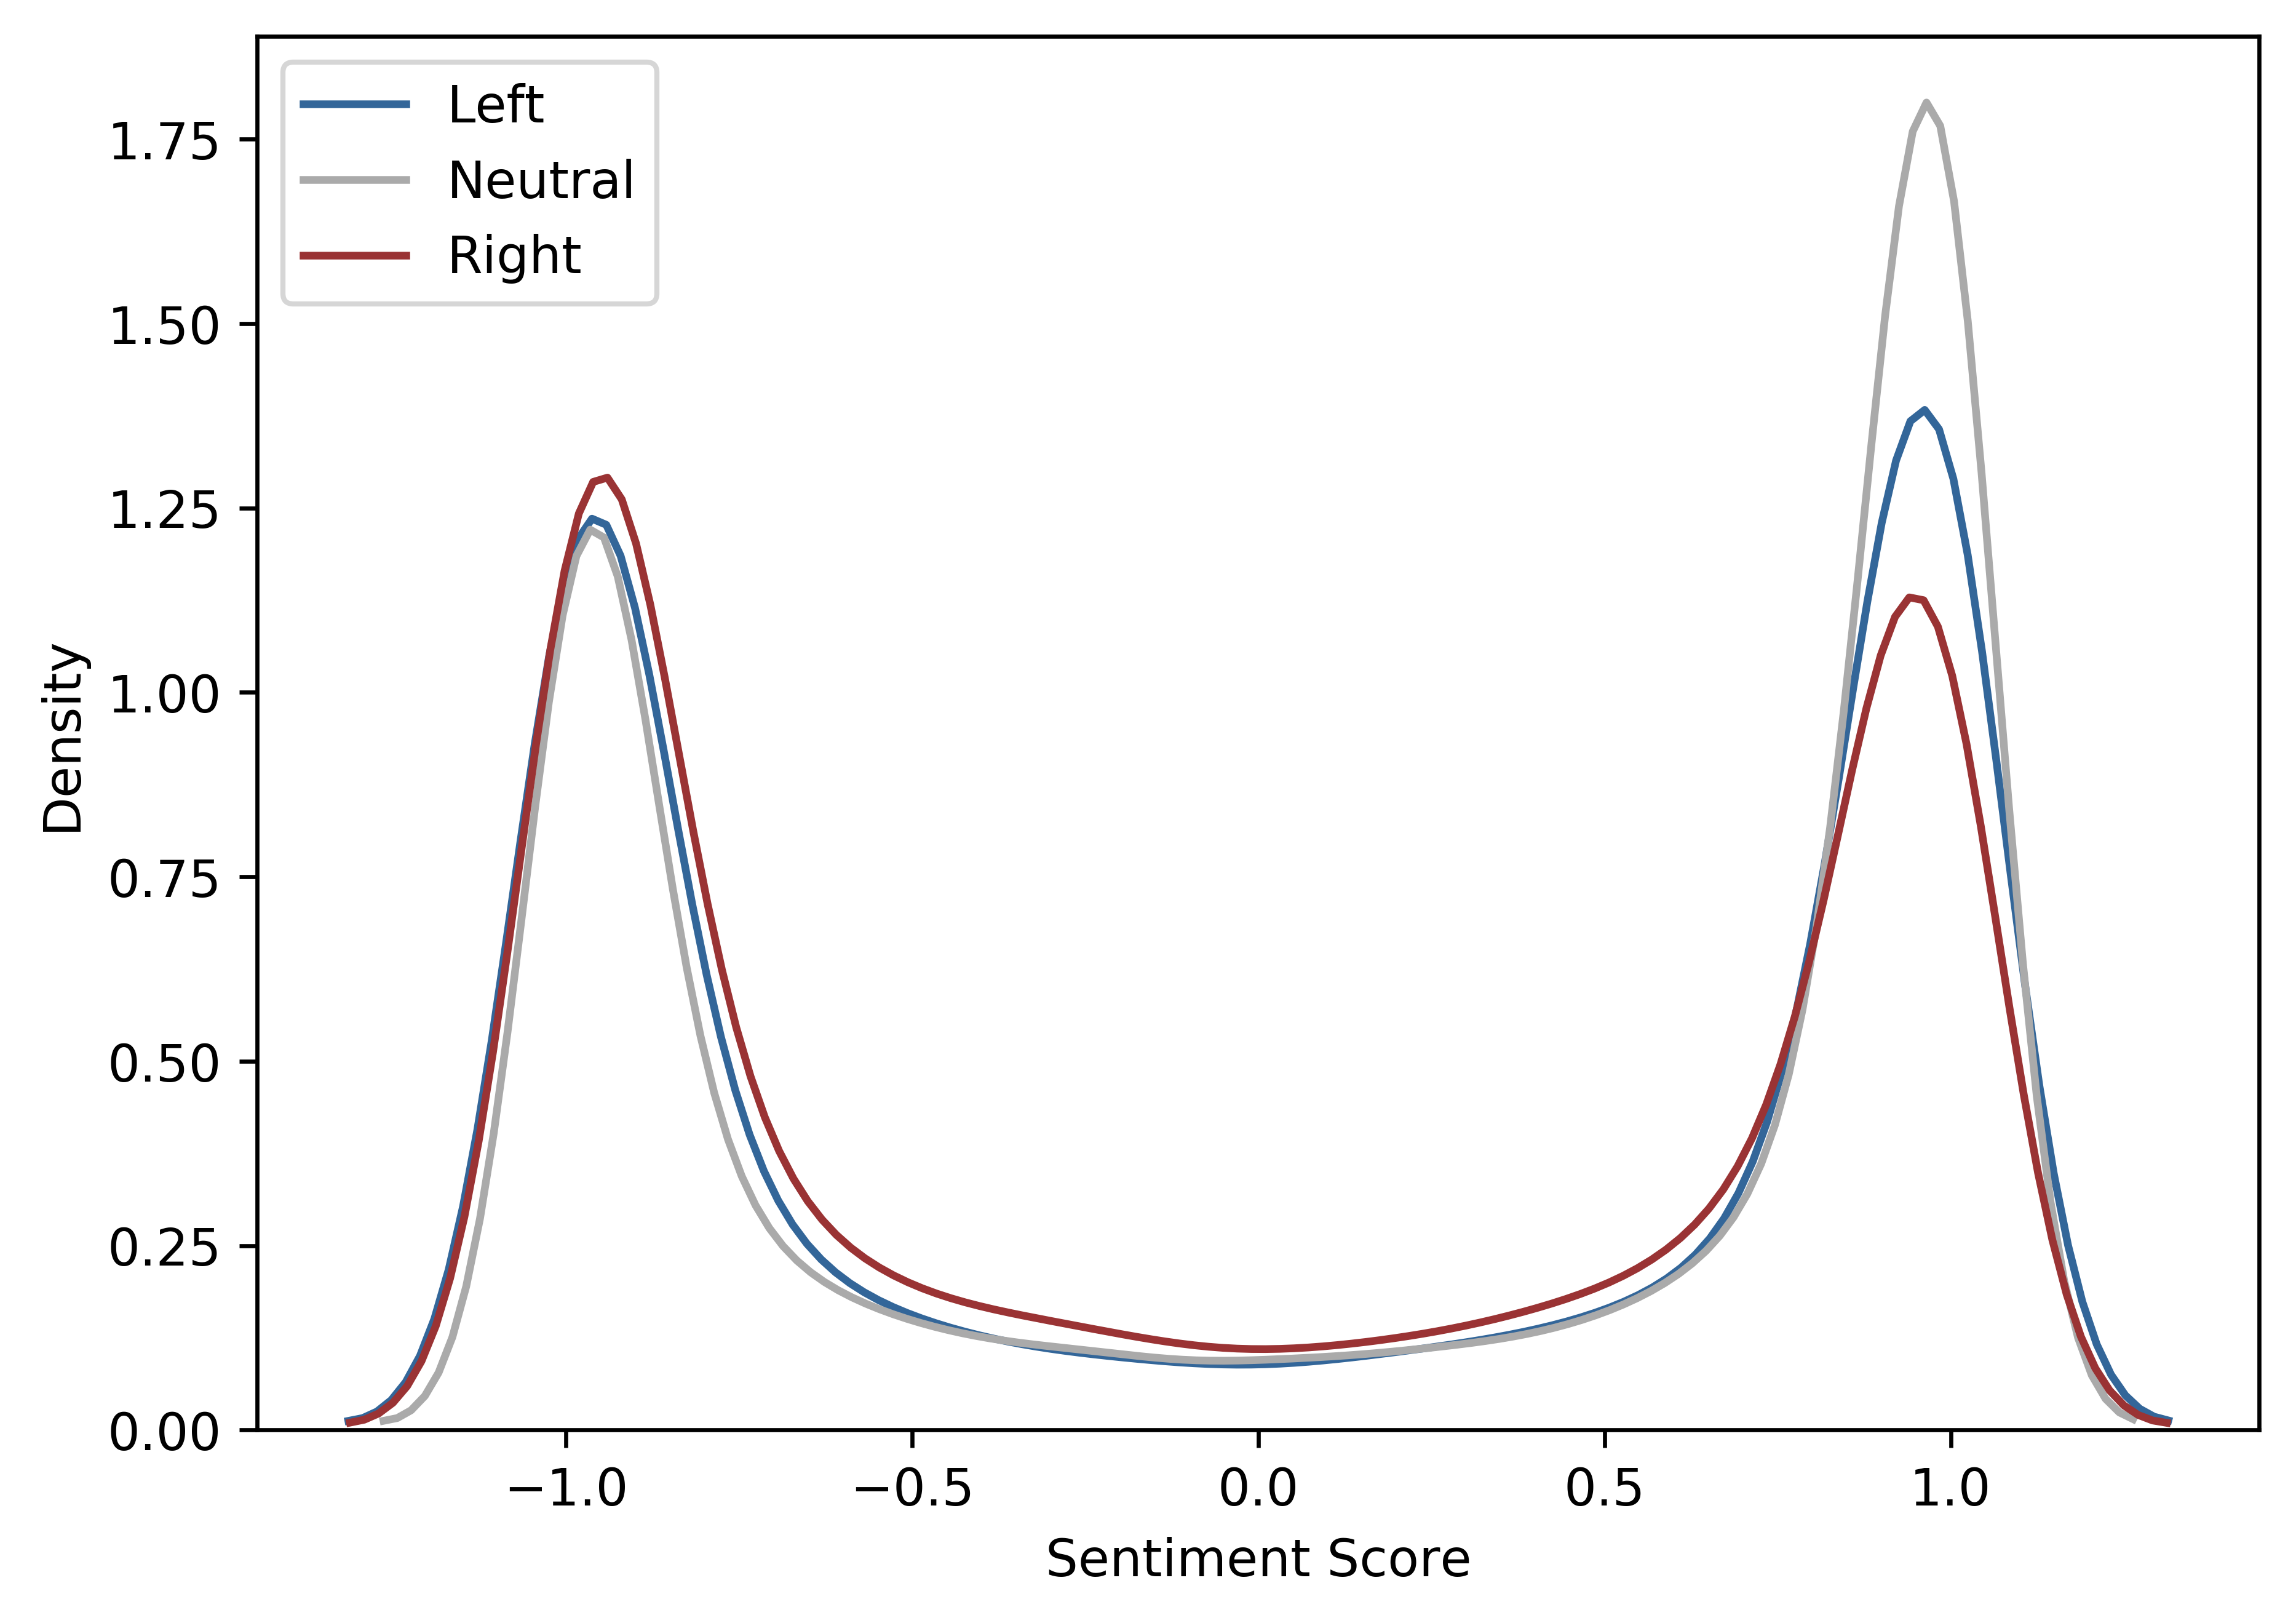

In [32]:
b=False
fig = plt.figure(figsize=(7,5), dpi=mydpi)
sns.kdeplot(left, shade=b, color=blue, label='Left')
sns.kdeplot(neutral, shade=b, color=grey, label='Neutral')
sns.kdeplot(right, shade=b, color=red, label='Right')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

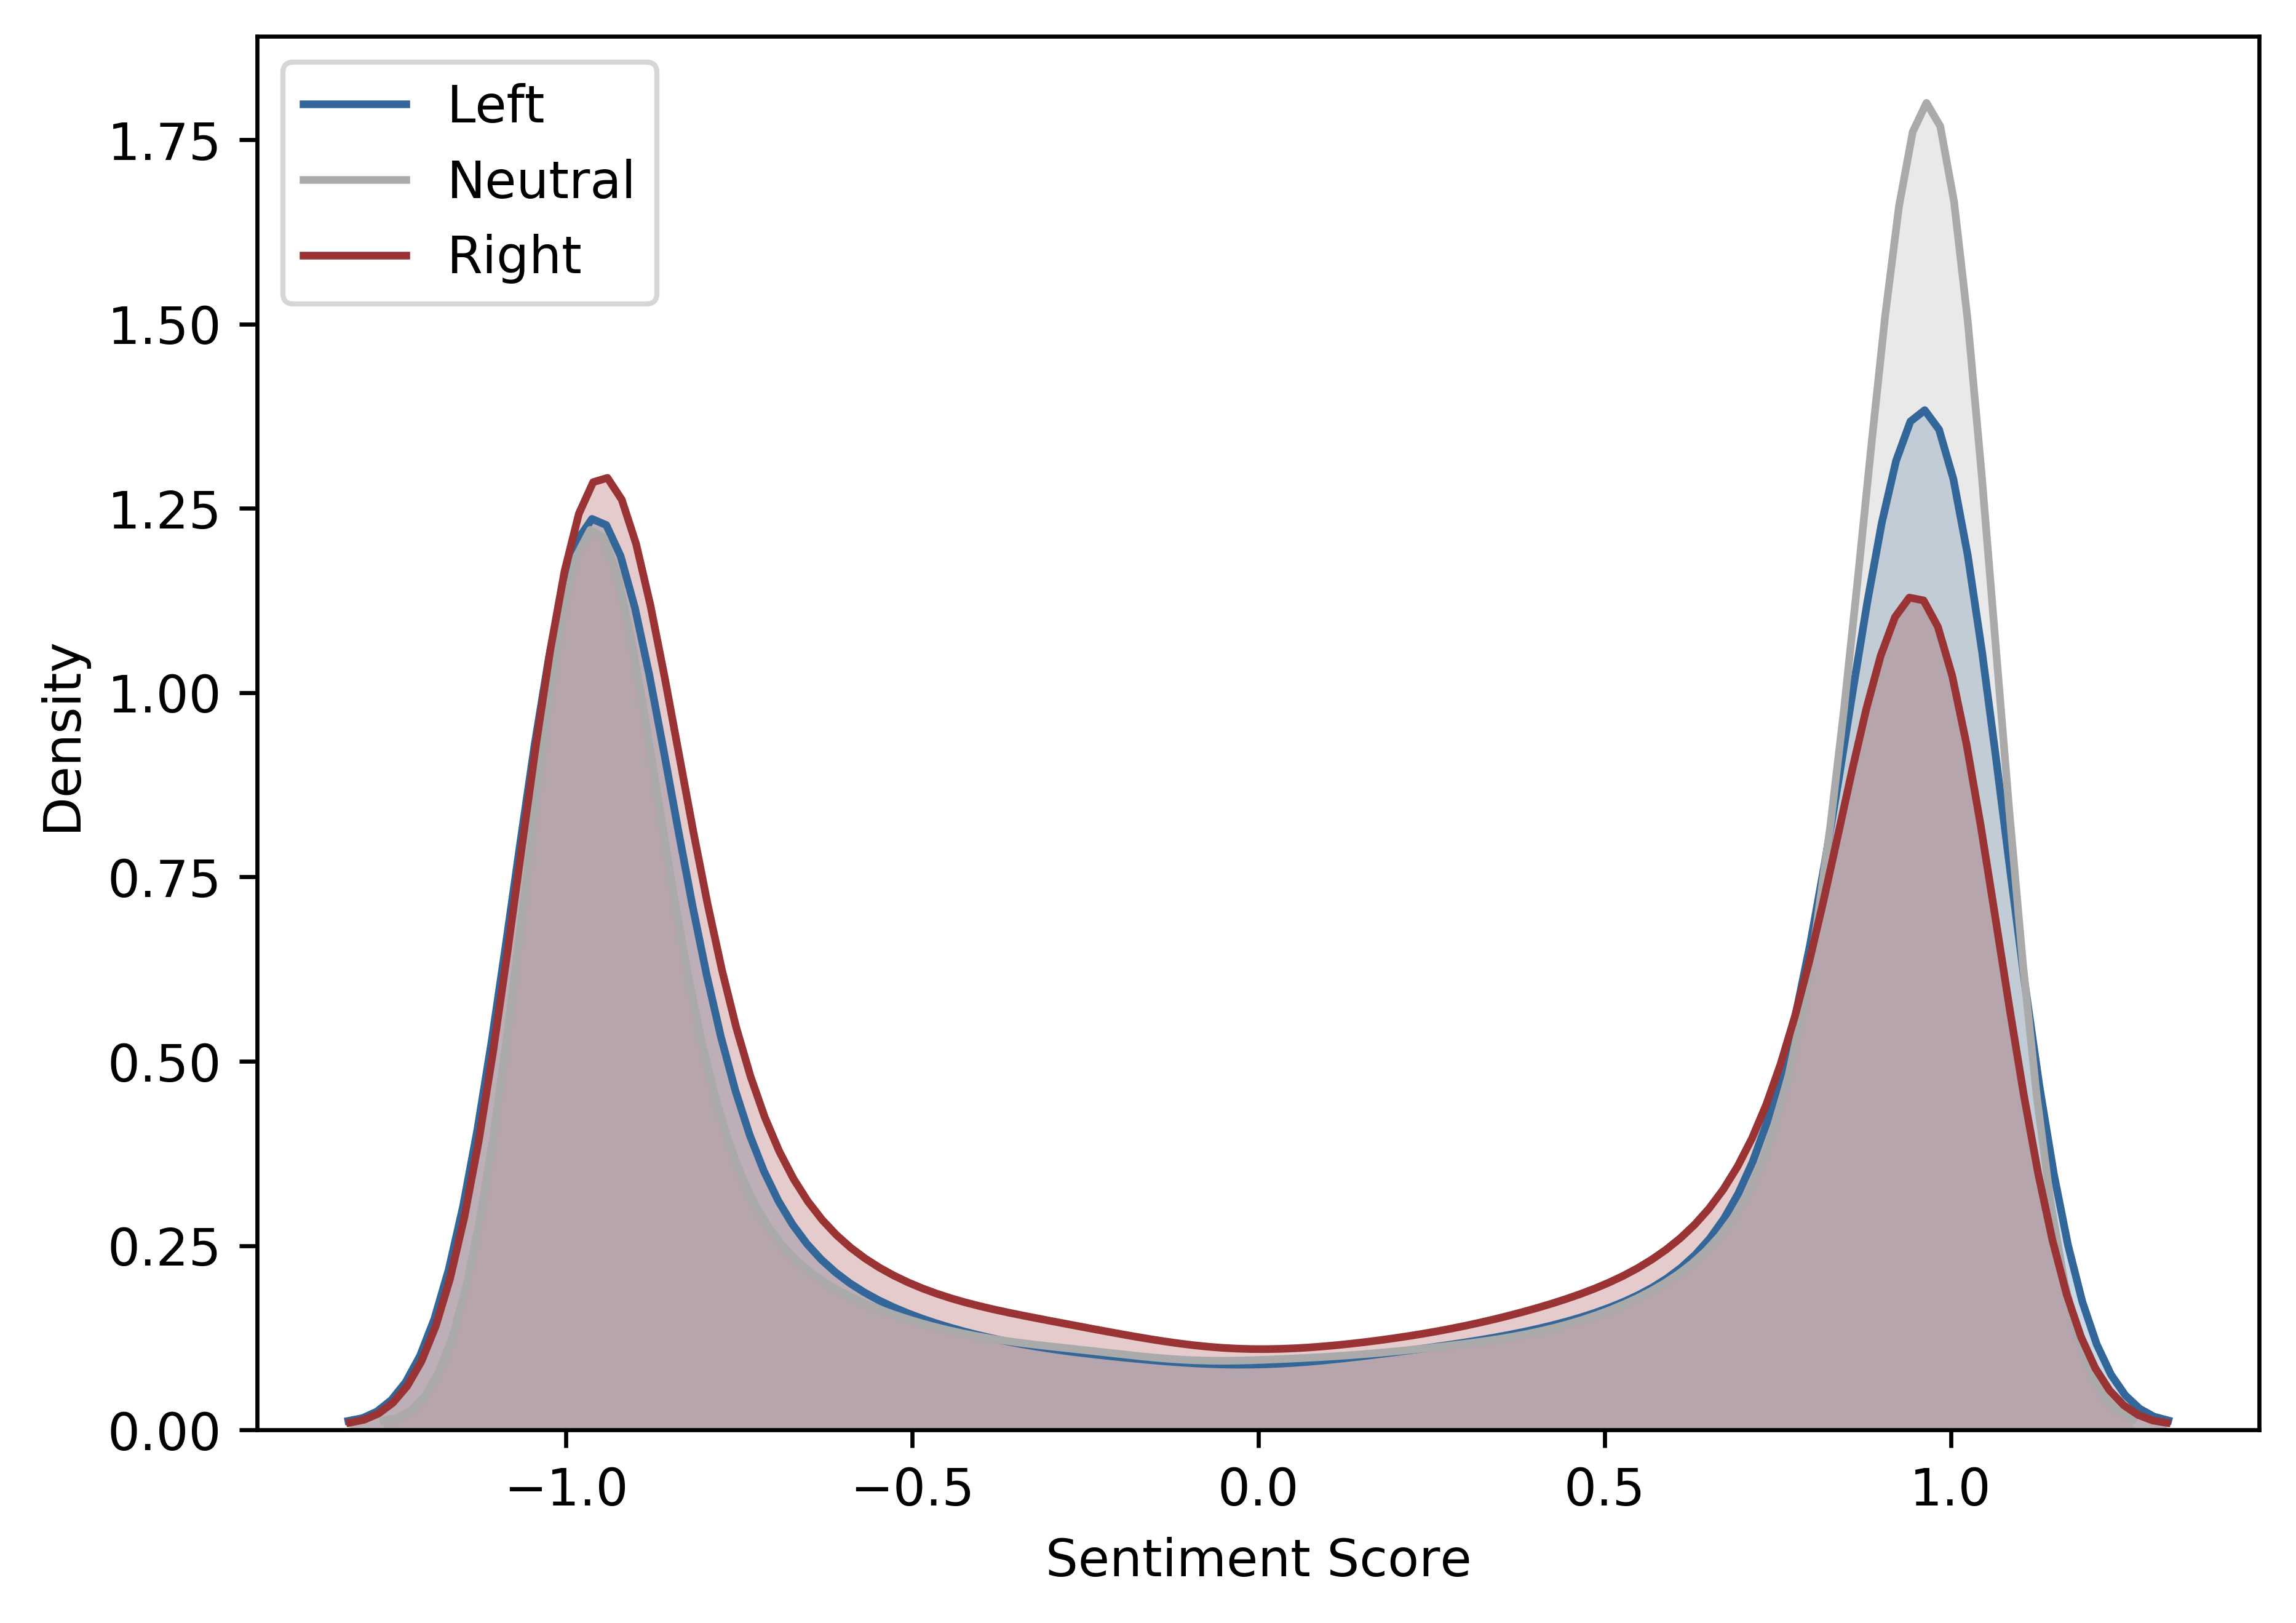

In [31]:
b=True
fig = plt.figure(figsize=(7,5), dpi=mydpi)
sns.kdeplot(left, shade=b, color=blue, label='Left')
sns.kdeplot(neutral, shade=b, color=grey, label='Neutral')
sns.kdeplot(right, shade=b, color=red, label='Right')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

#### Degrees of Freedom

In [27]:
def dof(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    s1 = np.var(sample1)
    s2 = np.var(sample2)
    
    enum = (np.true_divide(s1,n1) + np.true_divide(s2,n2))**2
    denom = np.true_divide(np.true_divide(s1,n1)**2, n1-1) + np.true_divide(np.true_divide(s2,n2)**2, n2-1)
    
    return np.true_divide(enum,denom)

#### Sentiment Means & STD

In [30]:
print ("Left (Mean, STD):", left.mean(), left.std())
print ("Neutral (Mean, STD):", neutral.mean(), neutral.std())
print ("Right (Mean, STD):", right.mean(), right.std())

Left (Mean, STD): 0.042468213661889395 0.8722935526969421
Neutral (Mean, STD): 0.14193302034687438 0.8619251559926437
Right (Mean, STD): -0.04512370066807531 0.8442362521744997


#### Sentiment Equal Variance Check

In [24]:
print (np.var(left), np.var(neutral), np.var(right))

0.7608817510704722 0.742908844770286 0.7127196366865699


#### Difference in Means Test

In [29]:
print ("Left - Right:", stats.ttest_ind(left, right, equal_var=True), dof(left, right))
print ("Left - Neutral:", stats.ttest_ind(left, neutral, equal_var=True), dof(left, neutral))
print ("Right - Neutral:", stats.ttest_ind(right, neutral, equal_var=True), dof(right, neutral))

Left - Right: Ttest_indResult(statistic=16.092317323575323, pvalue=3.418288283623262e-58) 99191.1806847653
Left - Neutral: Ttest_indResult(statistic=-22.113442054314817, pvalue=3.3084635413240495e-108) 100582.21945239475
Right - Neutral: Ttest_indResult(statistic=-40.120497226394505, pvalue=0.0) 86766.40355359881
